<a href="https://colab.research.google.com/github/cfreeman22/D213/blob/main/D213_task1_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __D213 Advanced Data Analytics Task 1 Time Series Analysis__

  

## __1.	Introduction__

  <p>  Time series analysis is a powerful tool for understanding and predicting complex systems that evolve. Whether the targeted tendency is financial data, weather patterns, or social media trends, time series analysis can provide valuable insights into patterns, trends, and seasonality. This project aims to explore the world of time series analysis, diving deep into the data to uncover hidden patterns and relationships in Teleco's daily revenues in the first two years of operation. The aim is to develop accurate forecasts and predictive models to help make informed decisions and drive business success. We will start by defining our research question and selecting appropriate data sources before moving on to data preparation and exploratory analysis. We will use cutting-edge techniques such as ARIMA and seasonal decomposition to uncover hidden patterns and identify key drivers of variation. By the end of this project, we will have gained a deep understanding of time series analysis and its applications.</p>

# __PART I: Research Question__
## __A.1 Summary of the research question__


<p>Through this investigation, the study aims to explore the trends and patterns that may exist within Teleco's daily revenue streams and determine if any notable correlations or relationships exist between revenue and other variables.</P>

__Research question:__ 
__Can we understand the daily patterns of Teleco revenues in the first two years of operation using time series analysis?__

## __A.2        Goals and objectives of the data analysis__

The primary objective of time series analysis is to understand the underlying patterns, trends, and behaviors in the Teleco time series dataset. In the context of the research question, the goal of time series analysis is to identify and analyze the daily patterns of Teleco revenues during the first two years of operation. Through this investigation, the study aims to explore the trends and patterns that may exist within Teleco's daily revenue streams and determine if any notable correlations or relationships exist between revenue and other variables. This analysis can provide valuable insights into how the revenues have evolved, how they are affected by different factors such as seasonality or external events, and what forecasts or predictions are plausible for future revenues. Additionally, the objectives of time series analysis in this scenario include identifying potential anomalies affecting the revenue data, detecting any underlying trends or cyclical patterns, and evaluating the effectiveness of different forecasting methods. By leveraging time series analysis techniques, the study hopes to develop a comprehensive understanding of Teleco's financial performance during this critical period, crucial in informing future business strategies and decision-making processes ().

# __Part II: Method Justification__
## __B.1 Assumption of a time series__
   Time series analysis relies on several assumptions, including:
1.	Stationarity: The time series data should have a constant mean, variance, and autocovariance over time. It means that the statistical properties of the data should stay the same over time.
2.	Autocorrelation: The observations in a time series depend on each other, and the correlation between them should be consistent over time.
3.	No seasonality: A seasonal adjustment is required before conducting a time series analysis if the time series exhibits seasonal patterns.
If the data is not stationary, the results of the time series analysis may be biased or inaccurate ().
<p> For this analysis, the assumption of stationarity is particularly relevant. The assumption of autocorrelation is also essential, as the goal is to understand how the daily revenues of Teleco depend on each other over time.</P>

# __PART III: Data Preparation__ 
##  __C   Data preparation summary__
##  __C.1  Line graph visualizing the realization of the time series__
   The graph belows displays a line graph  visualization of the Time Series Analysis. There is an upward trending line which usually indicates the presence of a trend in the data.

In [19]:
#Importing packages
import pandas as pd
import t_series_model as t_series
import matplotlib.pyplot as plt


In [3]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/teleco_time_series .csv'


Null Values:
 Revenue    0
dtype: int64


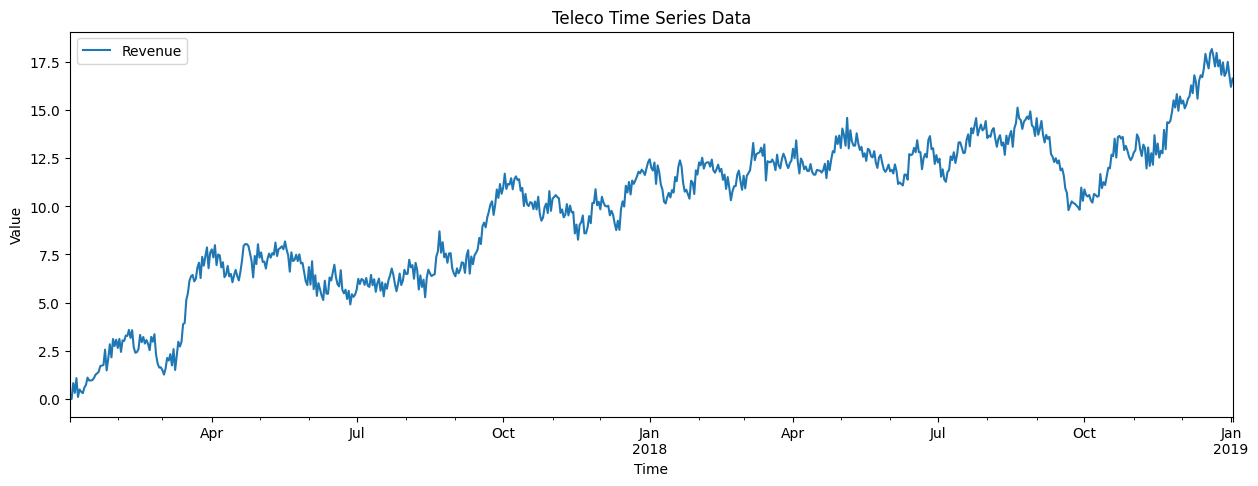

In [5]:
t_series.read_and_plot_data(file_path)

## __C2 Time step formating__

- checking for nulls with data.isnull().sum()
- Setting the Day column as the index for easier processing
- Since there is no starting date mentioned, let us assume the first date of operation was Jan 1st, 2017
   - The following pieces of code were used (packaged in custom made helper file to avoid cluttering the notebook) 
   - data.set_index('Day',inplace=True)
   - data.index=pd.to_datetime(data.index, unit = 'D', origin = '2017-01-01')
   
<p>From the graph above we notice that the frequency is complete, which means there are no gaps in the data, and it is all equally spaced. The data presented no null values, and the length ranged from 0 to 730, with 731 rows and two columns. The first column, "Day," is set as the index to be more easily processed as a time series. The index is converted to a panda's datetime with a starting date of Jan 1st, 2017, assuming that this was the telecommunication company's first operation date.</p>  

## __C3 Evaluate the Stationarity of the Time Series__

To evaluate the stationarity of a time series, we can use various statistical tests such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. These tests check if the mean and variance of the time series are constant over time. The output below displays the ADF test statistic, p-value, and critical values at different confidence levels. If the p-value is less than a specified significance level (e.g., 0.05), we can reject the null hypothesis that the time series is non-stationary. Our crucial values for stationarity are -3.4, -2.8, and -2.5, respectively, and our pvalue is 0.32. We can see from this result that our data is not stationary because the pvalue is greater than 0.05.

In [6]:
t_series.adf_test(pd.read_csv(file_path)['Revenue'])

Test Statistic           -1.924612
p-value                   0.320573
# Lags Used               1.000000
# Observations Used     729.000000
Critical Value (1%)      -3.439352
Critical Value (5%)      -2.865513
Critical Value (10%)     -2.568886
dtype: float64


## __C.4 Steps used to prepare the data for analysis__
- Setting the Day column as the index for easier processing
-	Converting the index into a DateTime object with a starting date of Jan 1st, 2017
- Evaluating and adjusting the stationarity of the Time Series using data_diff = data.diff().dropna()
- Checking for nulls and duplicates and saving a clean copy of the dataset.



## __C.5 Copy of the cleaned dataset__

 A copy of the prepared dataset is provided as an attached file with this submission.

# __PART IV: Model Identification and Analysis__ 
##  __D   Model analysis__
##  __D.1  Annotated findings with visualizations__

The annotated findings is crucial in determining whether differenced data is stationary. In this section, we will perform the ADF test on the adjusted data. The visualizations below show the trend of the original and adjusted time series. It also displays the autocorrelation and partial autocorrelation of the adjusted time series.

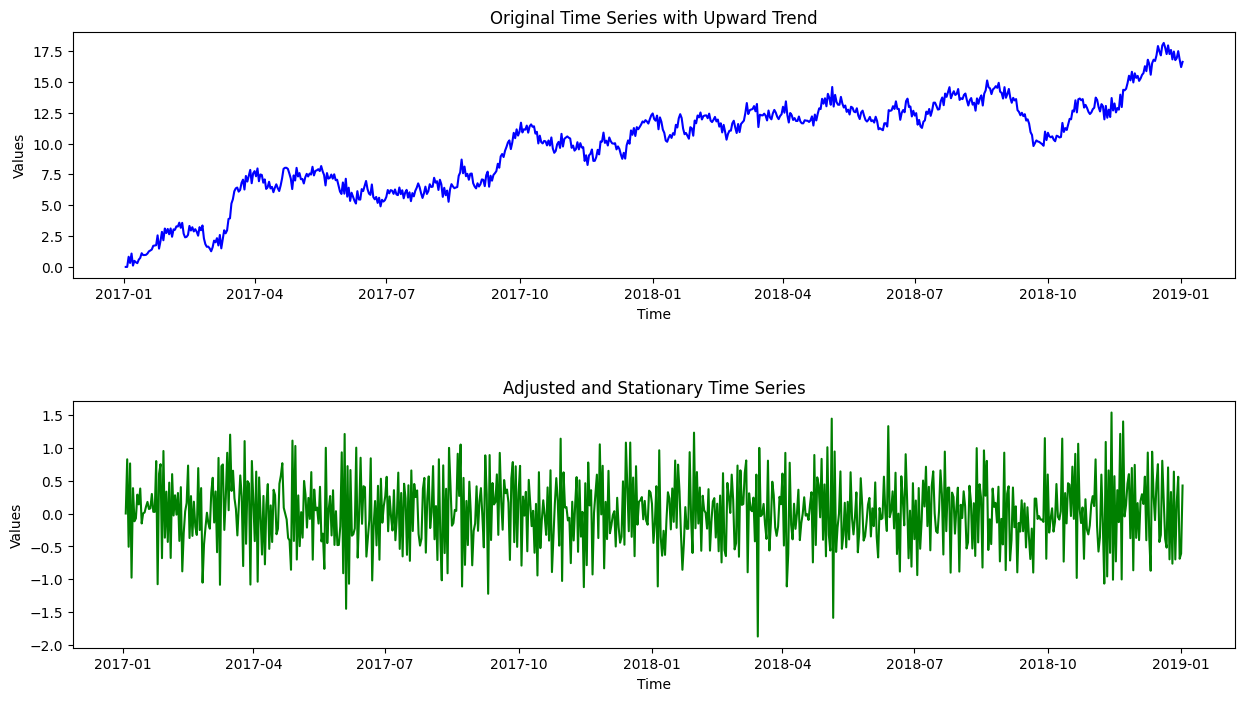

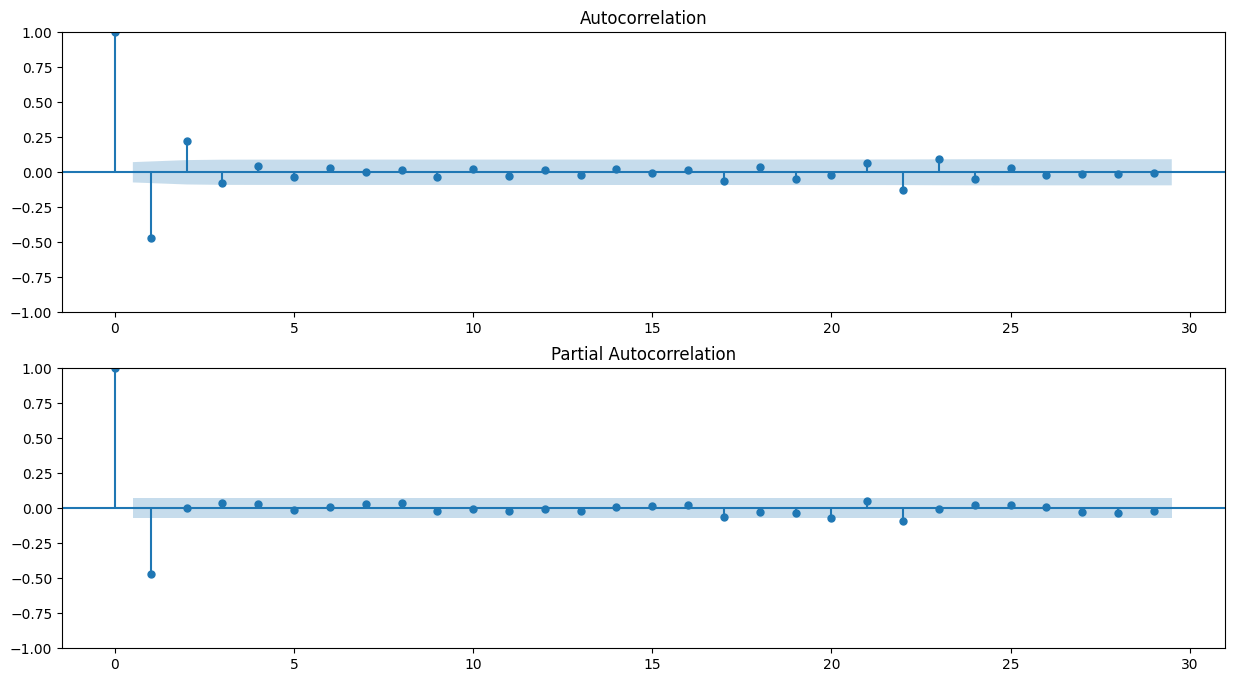

In [7]:
t_series.plot_stationarity_analysis(file_path)

In [8]:
#Testing Stationarity of the adjusted data
diff_data = t_series.diff_data(file_path)

In [9]:
#Testing Stationarity of the adjusted data
t_series.adf_test(diff_data['Revenue'])

Test Statistic          -44.874527
p-value                   0.000000
# Lags Used               0.000000
# Observations Used     729.000000
Critical Value (1%)      -3.439352
Critical Value (5%)      -2.865513
Critical Value (10%)     -2.568886
dtype: float64


In [10]:
#Checking for nulls
print(diff_data.isna().any())
print('****************')
#Checking for duplicates
print(diff_data.duplicated().any())

Revenue    False
dtype: bool
****************
False


In [15]:
# Saving a copy of cleaned data
#diff_data.to_csv('cleaned_time_series.csv', index = False)

<p>Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are powerful tools for understanding the correlation structure in time series data.
ACF measures the correlation between a time series and its lagged values. In contrast, PACF measures the correlation between a time series and its lagged values after removing the effect of shorter lags.
The ACF and PACF graphs can help us identify the values of the Autoregressive (AR)(p) and Moving Averages (MA)(q) parameters in an ARIMA model.</p>
<p>Autocorrelation Function (ACF) Plot: The ACF plot shows the correlation of a time series with its own lagged values. ACF values range between -1 and 1. Values close to -1 indicate a strong negative correlation, values close to 1 indicate a strong positive correlation, and values close to 0 indicate no correlation.</p> 
<p>Partial Autocorrelation Function (PACF) Plot: The PACF plot shows the correlation between a time series and its lagged values after removing the effect of shorter lags. PACF values also range between -1 and 1. Values close to -1 indicate a strong negative correlation, values close to 1 indicate a strong positive correlation, and values close to 0 indicate no correlation. ()</p>
<p>The graphs above help identify p, d, and q in the ARIMA model. AR helps identify p from the PACF plot. The ACF plot behaves the same way as the PACF. A sharp drop from 1 to 0 could indicate that the cut-off is 0. However, there is an extension closer to -1 and then back to 0, where it becomes stable. So, the value for p is potentially 1. We could also say that for the MA, the value for q could also be 1. Since the differentiated data is stationary, differencing is unnecessary, and the value for d is 0 (). </p>



We not notice above that the statistics for the diffrenced data have improved.
- The diffrenced data is stationary (No upward trend as in the original time series)
- The pvalue is 0, and  on this test it is way lower than the value on the original time series test

## __D2 Autoregressive integrated moving average (ARIMA) model__

It is necessary to perform a test with auto_arima to confirm the findings above. auto_arima will help determine the best model with the corresponding values for p, q, and d ().

In [12]:
# Split data into train and test sets
train_size = int(len(diff_data) * 0.66)
train, test = diff_data[:train_size], diff_data[train_size:]


In [13]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.9 MB/s eta 0:00:00


In [14]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
# Use auto_arima with trace on to fit the ARIMA model
arima_model = pm.auto_arima(train['Revenue'], trace=1)

# Print the optimal p, d, and q values
print('Optimal p: {}'.format(arima_model.order[0]))
print('Optimal d: {}'.format(arima_model.order[1]))
print('Optimal q: {}'.format(arima_model.order[2]))

# Fit the ARIMA model to the training data
arima_model.fit(train['Revenue'])

# Make predictions on the test data
predictions = arima_model.predict(n_periods=30)

# Print the predictions
print(predictions)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=646.561, Time=2.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=755.655, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=642.622, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=666.865, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=755.035, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=644.441, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=644.478, Time=0.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=645.872, Time=1.61 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=644.213, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 6.411 seconds
Optimal p: 1
Optimal d: 0
Optimal q: 0
2018-04-29   -0.343299
2018-04-30    0.199186
2018-05-01   -0.051319
2018-05-02    0.064357
2018-05-03    0.010941
2018-05-04    0.035607
2018-05-05    0.024217
2018-05-06    0.029477
2018-05-07    0.027048
2018-05-08    0.028169
2018-05-09    0.027652
201

In [15]:
 
# 1,0,0 ARIMA Model
model = ARIMA(train['Revenue'], order=(1,0,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  481
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -318.311
Date:                Thu, 20 Apr 2023   AIC                            642.622
Time:                        20:56:17   BIC                            655.150
Sample:                    01-03-2017   HQIC                           647.546
                         - 04-28-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0278      0.015      1.888      0.059      -0.001       0.057
ar.L1         -0.4618      0.040    -11.495      0.000      -0.541      -0.383
sigma2         0.2198      0.015     14.612      0.0

## __D3 Forecasting with derived ARIMA__

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Fit the model and make predictions
size = int(len(diff_data) * 0.66)
train, test = diff_data.iloc[:size], diff_data.iloc[size:]
history = [x for x in train['Revenue']]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Revenue'][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Calculate root mean squared error
rmse = sqrt(mean_squared_error(test['Revenue'], predictions))
print(f'RMSE: {rmse:.2f}')

 

predicted=0.176884, expected=-0.398402
predicted=0.508735, expected=0.442802
predicted=-0.177480, expected=-0.650088
predicted=0.156878, expected=1.008159
predicted=-0.220132, expected=-0.324824
predicted=0.663120, expected=-0.562324
predicted=-0.387268, expected=1.442980
predicted=-0.037208, expected=-1.585790
predicted=0.672962, expected=0.943729
predicted=-0.947698, expected=-0.583497
predicted=0.555142, expected=-0.212997
predicted=-0.488202, expected=-0.003891
predicted=-0.159125, expected=0.640939
predicted=0.162491, expected=-0.535783
predicted=0.338562, expected=-0.329183
predicted=-0.482313, expected=0.163790
predicted=-0.201442, expected=-0.513667
predicted=-0.011509, expected=0.178902
predicted=-0.334669, expected=-0.394099
predicted=0.030863, expected=0.628061
predicted=-0.130835, expected=-0.071771
predicted=0.447718, expected=-0.317071
predicted=-0.135290, expected=-0.057014
predicted=-0.249744, expected=0.321697
predicted=0.041163, expected=-0.589136
predicted=0.086078, 

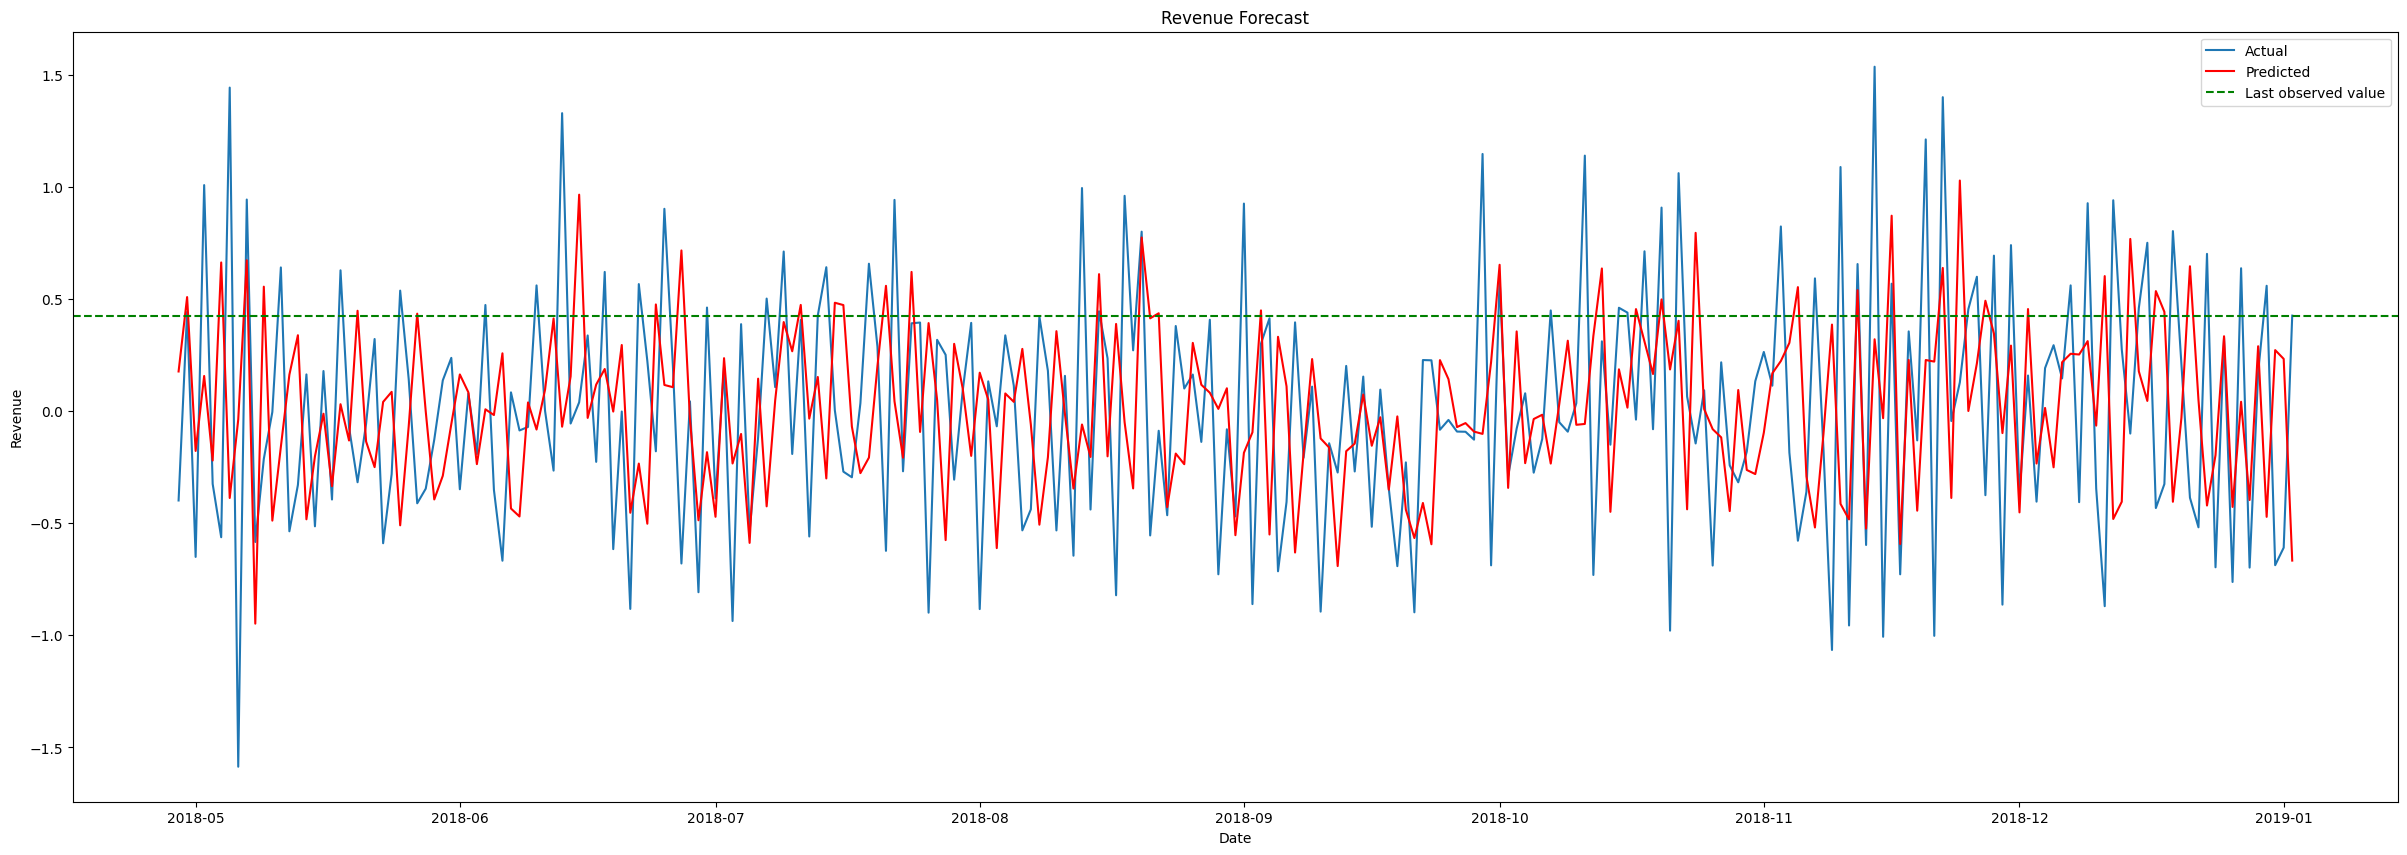

In [20]:
# Plot the results
plt.figure(figsize=(30,10))
plt.plot(test.index, test['Revenue'], label='Actual')
plt.plot(test.index, predictions, label='Predicted',color='red')
plt.axhline(y=test['Revenue'].iloc[-1], color='green', linestyle='--', label='Last observed value')
plt.title('Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

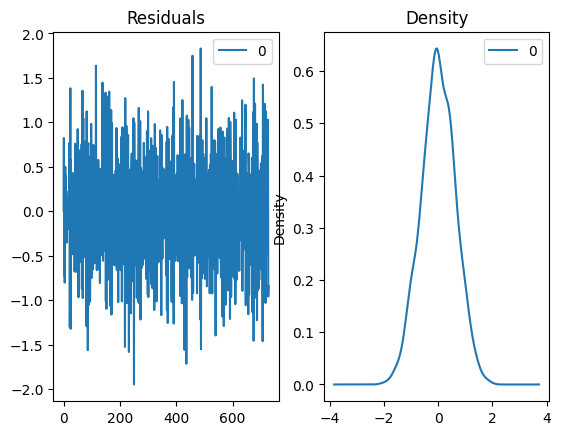

In [21]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

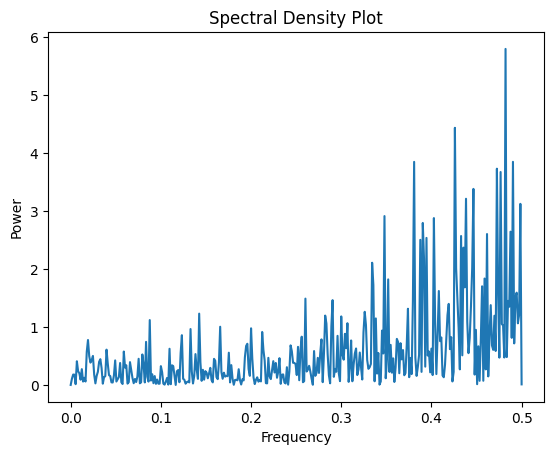

In [23]:
from scipy.signal import periodogram

# Compute the spectral density for the time series data
freq, power = periodogram(diff_data['Revenue']) 
 # Create a line plot of the spectral density 
plt.plot(freq, power) 
 # Set the plot title and axis labels 
plt.title('Spectral Density Plot') 
plt.xlabel('Frequency') 
plt.ylabel('Power') 

 # Show the plot 
plt.show()

## d4

## d5

# __Part V:  Data Summary and Implications__
## __E.  Findings Sumamary and assumptions__ 

# __Part VI:  Reporting__

## __F.  Report__

## __References__